## Using Yolo model to detect common objects


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import logging
from pathlib import Path

import cv2
import cvlib as cv
from cvlib.object_detection import draw_bbox
from IPython.display import Image, display


Displaying image: apple.jpg


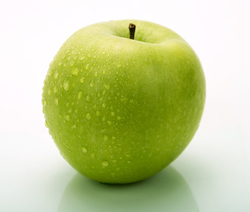


Displaying image: clock.jpg


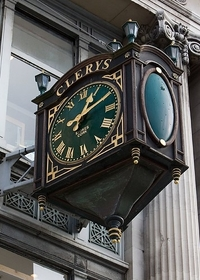

In [5]:
# Some example images
image_files = ['apple.jpg', 'clock.jpg']

for image_file in image_files:
    print(f"\nDisplaying image: {image_file}")
    display(Image(filename=f"images/{image_file}"))

In [6]:
def detect_and_export_box(
    filename,
    model="yolov3-tiny",
    confidence=0.5,
    input_images_path="images",
    export_path="images_with_boxes",
):
    """Detects common objects on an image and creates a new image with bounding boxes.

    Args:
        filename (str): Filename of the image.
        model (str): Either "yolov3" or "yolov3-tiny". Defaults to "yolov3-tiny".
        confidence (float, optional): Desired confidence level. Defaults to 0.5.
    Returns:
        output path (Path): the full path to were the resulting
           image is exported
    """

    # Images are stored under the images/ directory
    img_filepath = Path(".", input_images_path, filename).resolve()

    # Read the image into a numpy array
    img = cv2.imread(str(img_filepath))

    # Perform the object detection
    bbox, label, conf = cv.detect_common_objects(
        img, confidence=confidence, model=model
    )

    print(f"Processed image: {filename}")

    # Print detected objects with confidence level
    segments = {}
    for idx, (bb, l, c) in enumerate(zip(bbox, label, conf)):
        segments[idx] = (bb, l, c)

    # Create a new image that includes the bounding boxes
    output_image = draw_bbox(img, bbox, label, conf)

    # Save the image in the directory images_with_boxes
    output_path = Path(".", export_path, filename)
    cv2.imwrite(str(output_path.resolve()), output_image)
    return output_path, segments


Processed image: apple.jpg


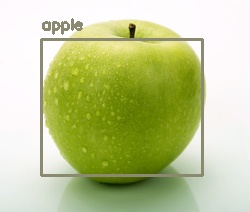

{0: ([41, 39, 202, 175], 'apple', 0.5717206597328186)}
Processed image: clock.jpg


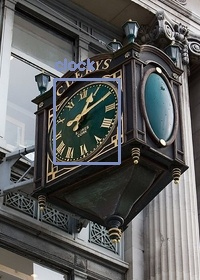

{0: ([54, 79, 119, 163], 'clock', 0.9683184623718262)}
Processed image: oranges.jpg


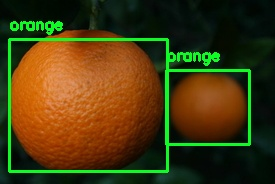

{0: ([166, 70, 249, 144], 'orange', 0.6185588836669922), 1: ([9, 39, 167, 171], 'orange', 0.5561690330505371)}


In [8]:
image_files = [
    'apple.jpg',
    'clock.jpg',
    'oranges.jpg'
]


for image_file in image_files:
    output_image, segments = detect_and_export_box(image_file)
    display(Image(output_image))
    print(segments)


Processed image: fruits.jpg


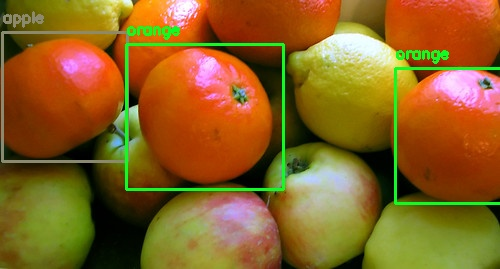

{0: ([2, 32, 127, 161], 'apple', 0.5818482041358948),
 1: ([126, 44, 283, 189], 'orange', 0.5346484184265137),
 2: ([395, 68, 501, 203], 'orange', 0.515099287033081)}

In [9]:
output_image, segments = detect_and_export_box("fruits.jpg")
display(Image(output_image))
segments

Processed image: fruits.jpg


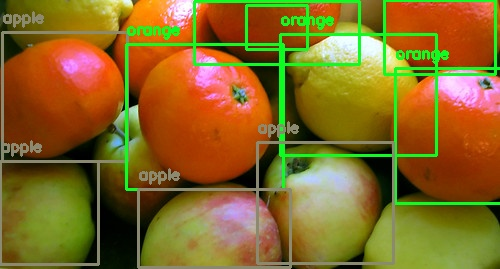

{0: ([2, 32, 127, 161], 'apple', 0.5818482041358948),
 1: ([126, 44, 283, 189], 'orange', 0.5346484184265137),
 2: ([395, 68, 501, 203], 'orange', 0.515099287033081),
 3: ([138, 189, 290, 267], 'apple', 0.34759870171546936),
 4: ([280, 34, 436, 155], 'orange', 0.32876086235046387),
 5: ([0, 161, 98, 264], 'apple', 0.31244686245918274),
 6: ([194, 1, 359, 64], 'orange', 0.27986079454421997),
 7: ([384, 0, 495, 74], 'orange', 0.2749977707862854),
 8: ([257, 142, 393, 263], 'apple', 0.2744504511356354),
 9: ([246, 5, 307, 49], 'orange', 0.21419058740139008)}

In [10]:
output_image, segments = detect_and_export_box("fruits.jpg", confidence=0.2)
display(Image(output_image))
segments